# Explore here

In [2]:
import pandas as pd
df = pd.read_csv('../data/raw/Aquifer_Petrignano.csv')
df

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,14/03/2006,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
1,15/03/2006,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
2,16/03/2006,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN
3,17/03/2006,NaN,-22.38,-22.04,NaN,NaN,NaN,NaN
4,18/03/2006,NaN,-22.60,-22.04,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
5218,26/06/2020,0.0,-25.68,-25.07,25.7,24.5,-29930.688,2.5
5219,27/06/2020,0.0,-25.80,-25.11,26.2,25.0,-31332.960,2.4
5220,28/06/2020,0.0,-25.80,-25.19,26.9,25.7,-32120.928,2.4
5221,29/06/2020,0.0,-25.78,-25.18,26.9,26.0,-30602.880,2.4


In [3]:
ts = df[['Date','Depth_to_Groundwater_P24']]

In [4]:
ts = ts.dropna()

In [5]:
ts

,Date,Depth_to_Groundwater_P24
0,14/03/2006,-22.48
1,15/03/2006,-22.38
2,16/03/2006,-22.25
3,17/03/2006,-22.38
4,18/03/2006,-22.60
...,...,...
5218,26/06/2020,-25.68
5219,27/06/2020,-25.80
5220,28/06/2020,-25.80
5221,29/06/2020,-25.78


In [6]:
ts = ts.set_index('Date')
ts

,Depth_to_Groundwater_P24
Date,
14/03/2006,-22.48
15/03/2006,-22.38
16/03/2006,-22.25
17/03/2006,-22.38
18/03/2006,-22.60
...,...
26/06/2020,-25.68
27/06/2020,-25.80
28/06/2020,-25.80


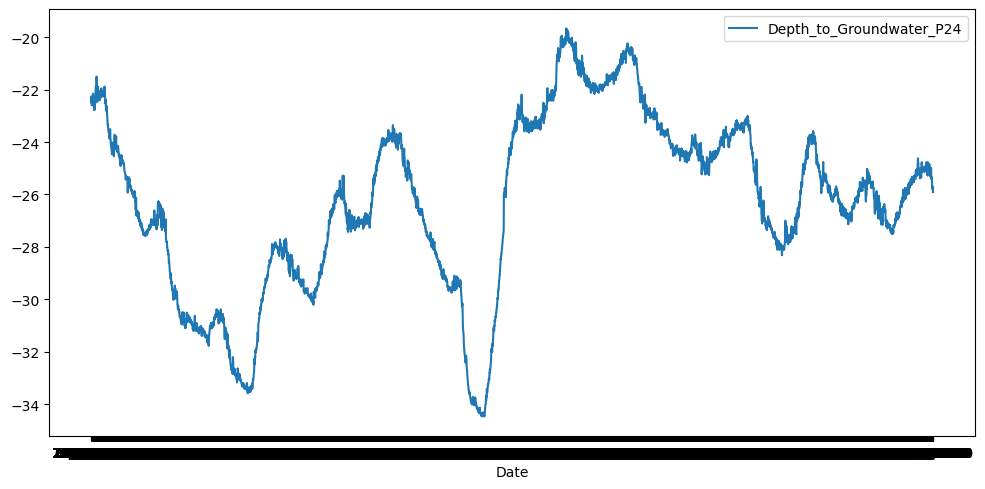

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)

plt.tight_layout()

plt.show()

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ts, period = 365)
decomposition

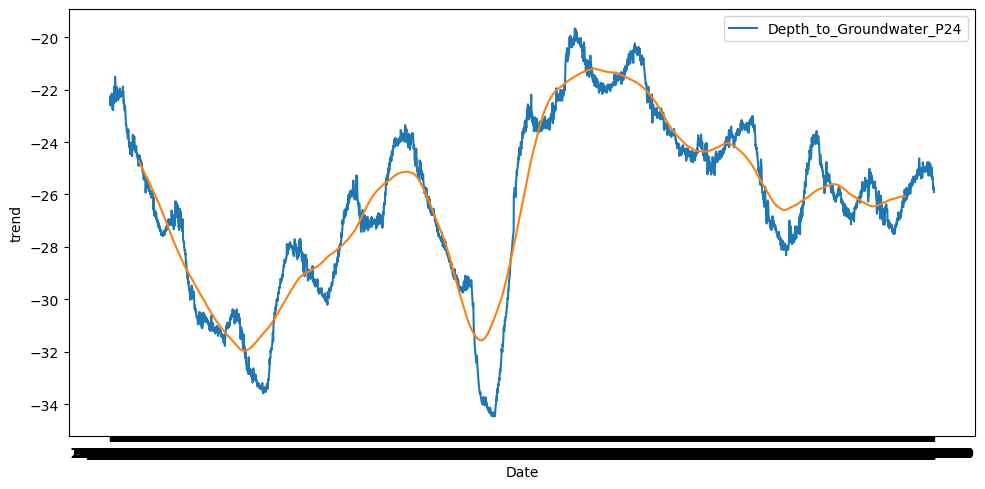

In [9]:
trend = decomposition.trend

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)
sns.lineplot(data = trend)

plt.tight_layout()

plt.show()

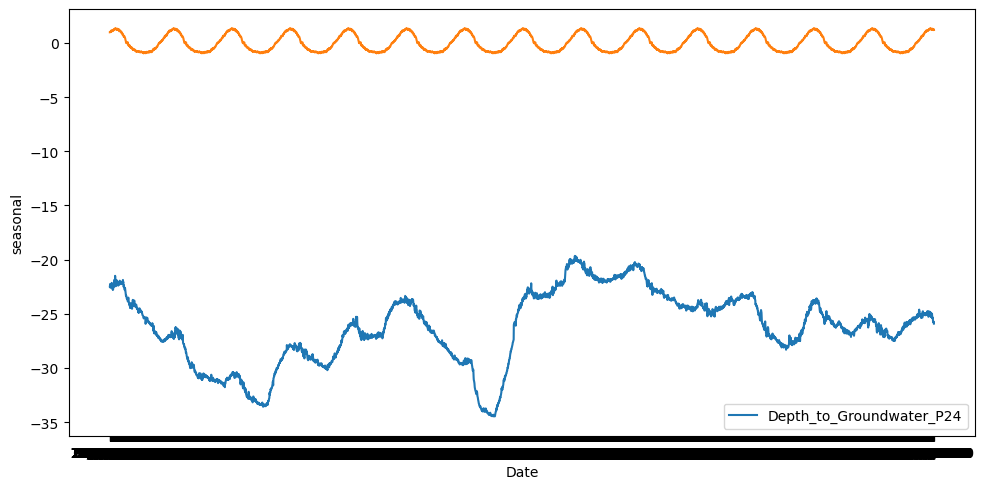

In [10]:
seasonal = decomposition.seasonal

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)
sns.lineplot(data = seasonal)

plt.tight_layout()

plt.show()

In [11]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    print("Resultados de la prueba de Dickey-Fuller:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(ts)

Resultados de la prueba de Dickey-Fuller:


Test Statistic                   -2.715890
p-value                           0.071329
#Lags Used                       29.000000
Number of Observations Used    5138.000000
Critical Value (1%)              -3.431623
Critical Value (5%)              -2.862103
Critical Value (10%)             -2.567070
dtype: float64

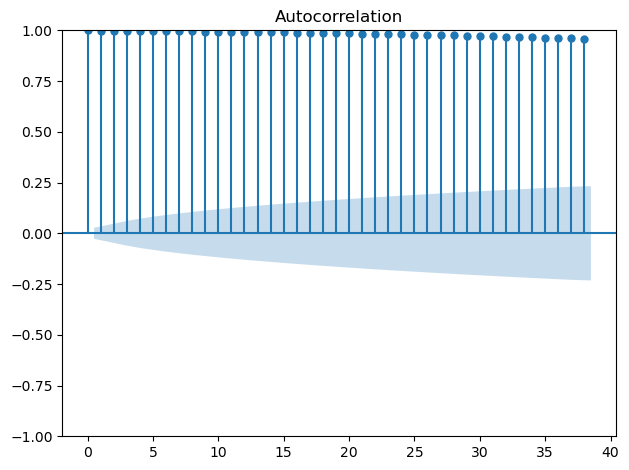

In [12]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

plot_acf(ts)

plt.tight_layout()

plt.show()

In [ ]:
from pmdarima import auto_arima

model = auto_arima(ts, seasonal = True, trace = True, m = 12) #m = 12, indica la frecuencia de la estacionalidad

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=-6549.330, Time=13.19 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-6419.165, Time=0.56 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-6455.530, Time=1.93 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-6465.092, Time=4.59 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-6421.030, Time=0.42 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=-6551.794, Time=11.58 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=-6553.419, Time=4.36 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=-6548.526, Time=13.29 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=-6520.702, Time=2.50 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=-6522.211, Time=4.14 sec
 ARIMA(3,1,2)(0,0,0)[12] intercept   : AIC=-6306.951, Time=5.84 sec
 ARIMA(2,1,3)(0,0,0)[12] intercept   : AIC=-6546.526, Time=6.58 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=-6510.368, Time=1.88 sec
 ARIMA(1,1,3)(0,0,0)[12] intercept   : AIC=-6520.164, Time=2.44 sec
 A

In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 5168
Model:             SARIMAX(3, 1, 2)x(1, 0, [], 12)   Log Likelihood                3344.195
Date:                             Mon, 24 Mar 2025   AIC                          -6674.391
Time:                                     16:07:16   BIC                          -6628.540
Sample:                                          0   HQIC                         -6658.348
                                            - 5168                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6602      0.027     60.631      0.000       1.607       1.714
ar.L2         -0.7110      0.027    -26.451      0.000      -0.764      -0.658
ar.L3          0.0443      0.014      3.084      0.002       0.016       0.072
ma.L1         -1.7809      0.026    -69.631      0.000      -1.831      -1.731
ma.L2          0.7938      0.025     31.308      0.000       0.744       0.843
ar.S.L12      -0.0432      0.013     -3.437      0.001      -0.068      -0.019
sigma2         0.0160      0.000     93.005      0.000       0.016       0.016
===================================================================================
Ljung-Box (L1) (Q):                   0.80   Jarque-Bera (JB):              5677.47
Prob(Q):                              0.37   Prob(JB):                         0.00
Heteroskedasticity (H):               1.05   Skew:                             0.51
Prob(H) (two-sided):                  0.28   Kurtosis:                         8.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
forecast = model.predict(n_periods = 365)
forecast

c:\Users\jklmo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


5168   -25.895280
5169   -25.885603
5170   -25.897457
5171   -25.914268
5172   -25.930389
          ...    
5528   -27.261078
5529   -27.261118
5530   -27.261157
5531   -27.261196
5532   -27.261233
Length: 365, dtype: float64

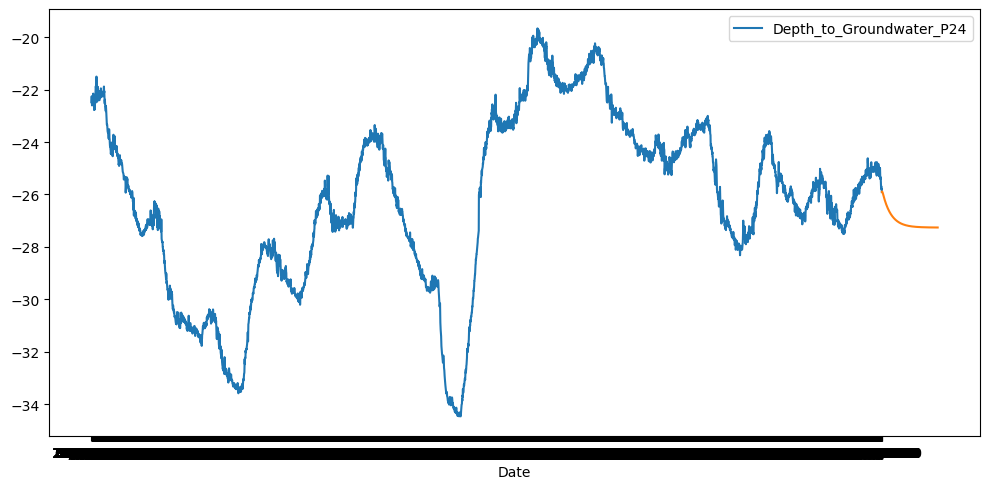

In [ ]:
fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)
sns.lineplot(data = forecast)
 
plt.tight_layout()

plt.show()